# Flash Model for [R32][emim_TF2N]
### Gabriela Franco
### 03/10/21

In [1]:
# import functions
import idaes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
from pyomo.opt import TerminationCondition, SolverStatus
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom
# import HFC_IL mixture properties
from HFC32_emimTf2N_PR import configuration

## Run Parameter Estimation Function

**T = 298.15 K**

In [2]:
#run parameter estimation function

# T= 298.15 k
from binary_param import binary_params_peng
from HFC32_emimTf2N_PR import configuration
binary_params_peng('R32_emimTf2N.csv', configuration, 'R32', 'emimTf2N', "x_R32", "x_emimTf2N", 
    init_temp = 298.15, init_press = 250200, init_x_c1 = 0.218, init_x_c2 =0.782 ,
    init_kappa_2_1 = -0.19, init_kappa_1_2 = -0.055, eps = 0.1, scaling_fac = 1e-4)


2021-03-15 10:35:42 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-15 10:35:42 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-15 10:35:42 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-15 10:35:42 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-15 10:35:42 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-15 10:35:42 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R3

2021-03-15 10:35:44 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-15 10:35:44 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-15 10:35:45 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-15 10:35:45 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-15 10:35:45 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-15 10:35:45 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2

2021-03-15 10:35:47 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-15 10:35:47 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-15 10:35:47 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-15 10:35:47 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-15 10:35:47 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-15 10:35:47 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phas

2021-03-15 10:35:49 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-15 10:35:49 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-15 10:35:49 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-15 10:35:49 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-03-15 10:35:49 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2021-03-15 10:35:49 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phas

Overall NLP error.......:   2.5160303210538788e-09    4.6452600953100429e-09


Number of objective function evaluations             = 13
Number of objective gradient evaluations             = 13
Number of equality constraint evaluations            = 13
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 13
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 12
Total CPU secs in IPOPT (w/o function evaluations)   =      0.017
Total CPU secs in NLP function evaluations           =      0.126

EXIT: Optimal Solution Found.
The SSE at the optimal solution is 56913.194683

The values for the parameters are as follows:
fs.properties.PR_kappa[R32,emimTf2N] = -0.05619426266499059
fs.properties.PR_kappa[emimTf2N,R32] = -0.20093139701829651


(56913.19468305483,
 {'fs.properties.PR_kappa[R32,emimTf2N]': -0.05619426266499059,
  'fs.properties.PR_kappa[emimTf2N,R32]': -0.20093139701829651})

## Create Flash Model

In [3]:
# Read data
data = pd.read_csv('R32_emimTf2N.csv')
data_283= data[0:7]
data_298 = data[7:15]
data_323 = data[15:23]
data_348 = data[23:31]
print(data_298)

    temperature  pressure  x_R32  x_emimTf2N
7        298.15      9600  0.010       0.990
8        298.15     99800  0.095       0.905
9        298.15    250200  0.218       0.782
10       298.15    399400  0.325       0.675
11       298.15    549400  0.417       0.583
12       298.15    699500  0.499       0.501
13       298.15    849500  0.570       0.430
14       298.15    999700  0.643       0.357


In [4]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

2021-03-15 10:35:53 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Liq was not assigned a type. Using generic Phase object.
2021-03-15 10:35:53 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties phase Vap was not assigned a type. Using generic Phase object.
2021-03-15 10:35:53 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component emimTf2N was not assigned a type. Using generic Component object.
2021-03-15 10:35:53 [WARNING] idaes.generic_models.properties.core.generic.generic_property: fs.properties component R32 was not assigned a type. Using generic Component object.
2021-03-15 10:35:53 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
The initial DOF is 7


**T=298.15 K**

In [5]:
# initialize arrays for x and P
R32_x = np.zeros((len(data_298)))
P = np.zeros((len(data_298)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_298)):
    m.fs.liq = data_298["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.flow_mol.fix(1) 
    m.fs.F101.inlet.temperature.fix(float(data_298["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_298["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_298["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_298["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_298["temperature"].iloc[i]))
    m.fs.properties.PR_kappa['emimTf2N', 'R32'].fix(-0.2)
    m.fs.properties.PR_kappa['R32', 'emimTf2N'].fix(-0.06) 
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))

    # solver
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    solver = SolverFactory('ipopt')
    solver.options = {'tol': 1e-6}
    status = solver.solve(m, tee = False)
#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])
    else:
        print('Infeasible.')

The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0


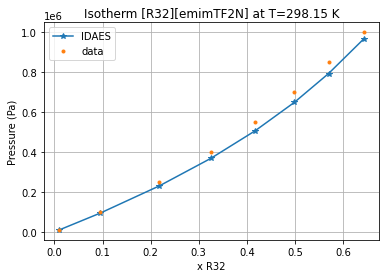

In [6]:
plt.plot(R32_x,P,"-*",label="IDAES")  
plt.plot(data_298["x_R32"],data_298["pressure"],".",label="data")  
plt.title('Isotherm [R32][emimTF2N] at T=298.15 K')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.legend()
plt.show()

## Sensitivity Analysis

**T= 298.15K**

In [7]:
# Read data
data = pd.read_csv('R32_emimTf2N.csv')
data_283= data[0:7]
data_298 = data[7:15]
data_323 = data[15:23]
data_348 = data[23:31]
print(data_298)

    temperature  pressure  x_R32  x_emimTf2N
7        298.15      9600  0.010       0.990
8        298.15     99800  0.095       0.905
9        298.15    250200  0.218       0.782
10       298.15    399400  0.325       0.675
11       298.15    549400  0.417       0.583
12       298.15    699500  0.499       0.501
13       298.15    849500  0.570       0.430
14       298.15    999700  0.643       0.357


**Change kappa values manually and see behavior**

In [8]:
def calc_outlet_xP(data,k21,k12):
    # create zeros arrays to be filled with x1 and P1
    R32_x = np.zeros((len(data)))
    P = np.zeros((len(data)))
    # model constraints
    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

    for i in range(len(data)):
        m.fs.liq = data["x_emimTf2N"].iloc[i]
        m.fs.F101.inlet.flow_mol.fix(1) 
        m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data["x_R32"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
        m.fs.properties.PR_kappa['emimTf2N', 'R32'].fix(k21) # (-0.20093)
        m.fs.properties.PR_kappa['R32', 'emimTf2N'].fix(k12) # (-0.05619)

#         DOF_final = degrees_of_freedom(m)
#         print("The final DOF is {0}".format(DOF_final))

        # solver
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        solver = SolverFactory('ipopt')
        solver.options = {'tol': 1e-6}
        status = solver.solve(m, tee = False)
    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
            R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
            P[i] = value(m.fs.F101.vap_outlet.pressure[0])
            
            
            
        else:
            print('Infeasible.')
    return(R32_x,P)

In [9]:
# plot function to see if it works - works when i store value, plot, store value 2, plot 2 etc
def plot_sens_analysis(data,kappa21,kappa12,T_label):
    x1,P1= calc_outlet_xP(data, kappa21[0],kappa12[0])
    plt.plot(x1,P1,"b+-",label="K21=-0.2, K12=-0.056")
    x2,P2= calc_outlet_xP(data,kappa21[0],kappa12[1])
    plt.plot(x2,P2,"g+",label="K21=-0.2, K12=-0.066")
    x3,P3= calc_outlet_xP(data,kappa21[0],kappa12[2])
    plt.plot(x3,P3,"m+",label="K21=-0.2, K12=-0.076")
    x4,P4= calc_outlet_xP(data,kappa21[0],kappa12[3])
    plt.plot(x4,P4,"c+",label="K21=-0.2, K12=-0.086")
    x5,P5= calc_outlet_xP(data,kappa21[1],kappa12[0])
    plt.plot(x5,P5,"b*",label="K21=-0.3, K12=-0.056")
    x6,P6= calc_outlet_xP(data,kappa21[1],kappa12[1])
    plt.plot(x6,P6,"g*",label="K21=-0.3, K12=-0.066")
    x7,P7= calc_outlet_xP(data,kappa21[1],kappa12[2])
    plt.plot(x7,P7,"m*",label="K21=-0.3, K12=-0.076")
    x8,P8= calc_outlet_xP(data,kappa21[1],kappa12[3])
    plt.plot(x8,P8,"c*",label="K21=-0.3, K12=-0.086")
    x9,P9= calc_outlet_xP(data,kappa21[2],kappa12[0])
    plt.plot(x9,P9,"b^",label="K21=-0.4, K12=-0.056")
    x10,P10= calc_outlet_xP(data,kappa21[2],kappa12[1])
    plt.plot(x10,P10,"g^",label="K21=-0.4, K12=-0.066")
    x11,P11= calc_outlet_xP(data,kappa21[2],kappa12[2])
    plt.plot(x11,P11,"m^",label="K21=-0.4, K12=-0.076")
    x12,P12= calc_outlet_xP(data,kappa21[2],kappa12[3])
    plt.plot(x12,P12,"c^",label="K21=-0.4, K12=-0.086")
    # plot data and configuration
    plt.plot(data["x_R32"],data["pressure"],"r.",label="data")  
    plt.title('Isotherm [R32][emimTF2N] at '+ T_label)
    plt.ylabel('Pressure (Pa)')
    plt.xlabel('x R32')
    plt.grid(True)
    plt.legend()
    plt.show()

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usual

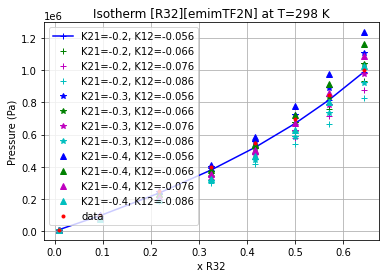

In [10]:
kappa21= np.array([-0.200,-0.30,-0.40,-0.5])
kappa12= np.array([-0.056,-0.066,-0.076,-0.086])
plot_sens_analysis(data_298,kappa21,kappa12, "T=298 K")

#### ^^^^ from this graph, the blue + sign looks like the best fit

**Try a nested for loop for sensitivity analysis**

In [11]:
# # initialize arrays for x and P
# k_21 = np.array([-0.20,-0.50,-0.7])
# k_12 = np.array([-0.07,-0.50,-0.03])
# # print(k21)
# # print(k12)
# R32_x = np.zeros((len(data_298)))
# P = np.zeros((len(k_21),len(k_12),len(data_298)))

# m.fs.liq = Param(mutable=True,default=0.040)
# m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

# for i  in range(len(k_21)): # 10 kappas
#     m.fs.properties.PR_kappa['emimTf2N', 'R32'].fix(k_21[i])
    
#     for j  in range(len(k_12)): # 10 kappas
#         m.fs.properties.PR_kappa['R32', 'emimTf2N'].fix(k_12[j])
        
#         for k in range(len(data_298)): # length of data array (10 rows (10 kappas), 8 columns (8 mol frac/pressure))
#             m.fs.liq = data_298["x_emimTf2N"].iloc[k]
#             m.fs.F101.inlet.flow_mol.fix(1) 
#             m.fs.F101.inlet.temperature.fix(float(data_298["temperature"].iloc[k]))
#             m.fs.F101.inlet.pressure.fix(float(data_298["pressure"].iloc[k]))
#             m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data_298["x_R32"].iloc[k])+0.1)
#             m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_298["x_R32"].iloc[k]+0.1)))
#             m.fs.F101.vap_outlet.temperature.fix(float(data_298["temperature"].iloc[k]))

#             DOF_final = degrees_of_freedom(m)
#             print("The final DOF is {0}".format(DOF_final))

#             try: # solver
#                 m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
#                 solver = SolverFactory('ipopt')
#                 solver.options = {'tol': 1e-6}
#                 status = solver.solve(m, tee = False)
#                 if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
#                     R32_x[k] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
#                     P[i,j,k] = value(m.fs.F101.vap_outlet.pressure[0])
#                 else:
#                     print('Infeasible.')
#                     P[i,j,k] = 0
#             except ValueError:
#                 P[i,j,k] = 0
                

## Plot all isotherms with Sensitivity Analysis Kappas

In [12]:
# initialize arrays for x and P
R32_x = np.zeros((len(data)))
P = np.zeros((len(data)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data)):
    m.fs.liq = data["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.flow_mol.fix(1) 
    m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data["x_R32"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))
    m.fs.properties.PR_kappa['emimTf2N', 'R32'].fix(-0.200) # (-0.20093)
    m.fs.properties.PR_kappa['R32', 'emimTf2N'].fix(-0.056)
    
    DOF_final = degrees_of_freedom(m)
    print("The final DOF is {0}".format(DOF_final))

    # solver
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    solver = SolverFactory('ipopt')
    solver.options = {'tol': 1e-6}
    status = solver.solve(m, tee = False)
#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])
    else:
        print('Infeasible.')

    'pyomo.core.base.param.SimpleParam'>) on block fs with a new Component
    (type=<class 'pyomo.core.base.param.SimpleParam'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block fs with a new
    Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The final DOF is 0
The

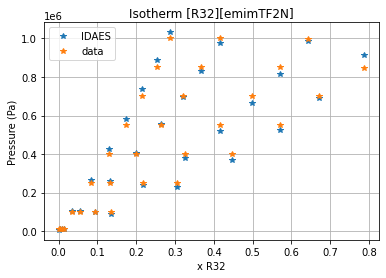

In [13]:
plt.plot(R32_x,P,"*",label="IDAES")  
plt.plot(data["x_R32"],data["pressure"],"*",label="data")  
plt.title('Isotherm [R32][emimTF2N]')
plt.ylabel('Pressure (Pa)')
plt.xlabel('x R32')
plt.grid(True)
plt.legend()
plt.show()